<a href="https://colab.research.google.com/github/CliffBooth/telecom_labs/blob/main/code/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [329]:
# Get thinkdsp.py
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# **Лабораторная работа №2**

**Exercise #2.2**

A sawtooth signal has a waveform that ramps up linearly from
-1 to 1, then drops to -1 and repeats.
Write a class called SawtoothSignal that extends Signal and provides
evaluate to evaluate a sawtooth signal.
Compute the spectrum of a sawtooth wave. How does the harmonic structure
compare to triangle and square waves?

класс SawToothSignal унаследуем от класса Sinusoid, так как он имеет необходимые характеристики, такие как частота, период, сдвиг: 

In [330]:
class SawToothSignal(Sinusoid):
  def evaluate(self, ts):
    ts = np.asarray(ts)
    cycles = self.freq * ts + self.offset / np.pi / 2
    frac, _ = np.modf(cycles)
    ys = normalize(unbias(frac), self.amp)
    return ys

Создадим пилообразный сигнал и послущаем как он звучит

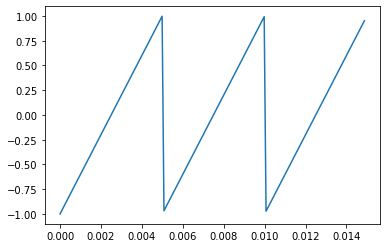

In [331]:
signal = SawToothSignal(200)
signal.plot()
wave = signal.make_wave()
wave.make_audio()

Посмотрим на спектр этого сигнала

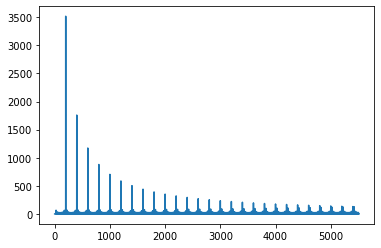

In [332]:
spectrum = wave.make_spectrum()
spectrum.plot()

Сравним спектр пилообразного сигнала со спектрами квадратнгого и треугольного сигналов:

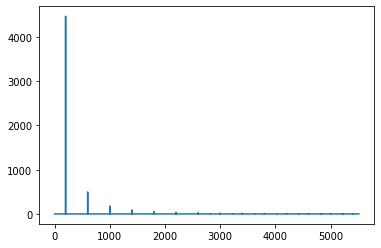

In [333]:
triangle = TriangleSignal(200)
triangle.make_wave().make_spectrum().plot()

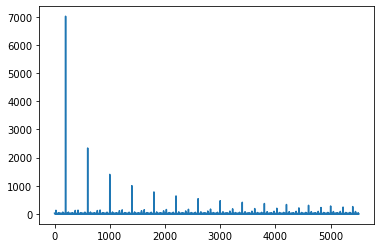

In [334]:
square = SquareSignal(200)
square.make_wave().make_spectrum().plot()

Можно заметить, что амплитуда пилообразного сигнала падаеет также как и спектр квадратного сигнала (пропорционально частоте), однако в отличие от квадратного он включает в себя и четные и нечетные гармоники.

Амплитуда треугольного же сигнала убывает в пропорции 1/f^2, в то время как амплитуда пилообразного сигнала в пропорции 1/f 

**Exercise #2.3**

Make a square signal at 1100 Hz and make a wave that samples
it at 10000 frames per second. If you plot the spectrum, you can see that most
of the harmonics are aliased. When you listen to the wave, can you hear the
aliased harmonics?


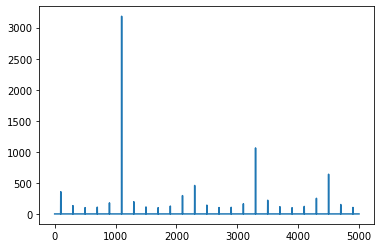

In [335]:
signal = SquareSignal(freq=1100)
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.make_spectrum().plot()

Базовая частота = 1100 Hz, первая гармоника на частоте 3300 Hz, вторая должна быть на 5500, но из-за наложения она на частоте 4500


In [336]:
wave.make_audio()

Когда мы слушаем волну, мы воспринимаем фуедаментальную частоту 1100 Hz, для сравнения синусоидный сигнал с частотой 1100 Hz:


In [337]:
SinSignal(1100).make_wave(duration=0.5, framerate=10000).make_audio()

**Exercise #2.4**

If you have a spectrum object, spectrum, and print the first few
values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0]
is the magnitude of the component with frequency 0. But what does that
mean?
Try this experiment:
1. Make a triangle signal with frequency 440 and make a Wave with dura-
tion 0.01 seconds. Plot the waveform.
2. Make a Spectrum object and print spectrum.hs[0]. What is the am-
plitude and phase of this component?
3. Set spectrum.hs[0] = 100. Make a Wave from the modified Spectrum
and plot it. What effect does this operation have on the waveform?

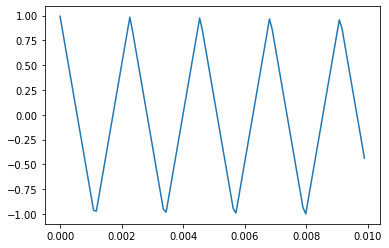

In [338]:
triangle = TriangleSignal(440).make_wave(duration=0.01)
triangle.plot()

In [339]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Первый элемент спектра - это комплексное число близкое к 0.

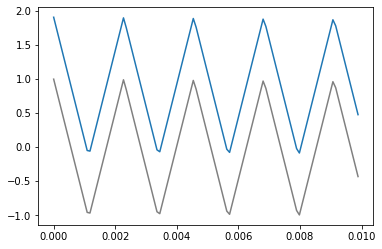

In [340]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()
triangle.plot(color = 'grey')

Можно заметить, что после того как мы зменили первый элемент спектра, весь спектр сместился вверх. Следовательно, от первого элемента зависит смещение

**Exercise #2.5**

Write a function that takes a Spectrum as a parameter and
modifies it by dividing each element of hs by the corresponding frequency
from fs. Hint: since division by zero is undefined, you might want to set
spectrum.hs[0] = 0.
Test your function using a square, triangle, or sawtooth wave.
1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect
does this operation have on the signal?

In [341]:
def divide(spectrum: Spectrum):
  spectrum.hs[1:] /= spectrum.fs[1:]
  spectrum.hs[0] = 0

In [342]:
square = SquareSignal().make_wave().make_spectrum()
triangle = TriangleSignal().make_wave().make_spectrum()
sawTooth = SawToothSignal().make_wave().make_spectrum()


Построим графики сигналов до и после применения к ним написанной функции:

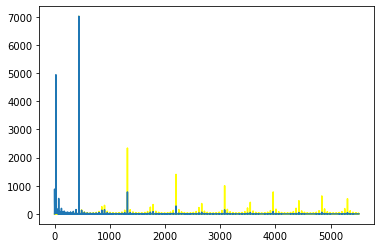

In [343]:
square.plot(color='yellow')
divide(square)
square.scale(440)
square.plot()

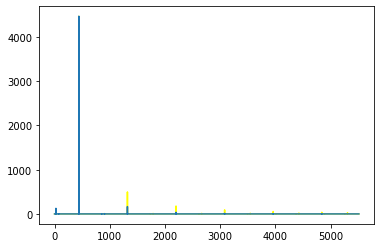

In [344]:
triangle.plot(color='yellow')
divide(triangle)
triangle.scale(440)
triangle.plot()

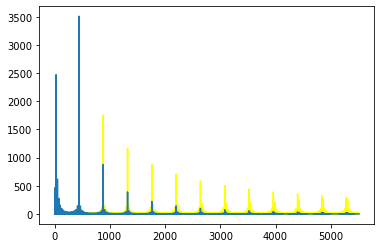

In [345]:
sawTooth.plot(color='yellow')
divide(sawTooth)
sawTooth.scale(440)
sawTooth.plot()

Видно, что функция уменьшает гормоники, так что можно сказать, что функция оказывает тот же эффект, что и low_pass()

**Exercise #2.6**

Triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square
and sawtooth waves drop off in proportion to 1/f ; the harmonics of the triangle wave drop off like 1/f 2. Can you find a waveform that has even and odd
harmonics that drop off like 1/f 2?

Hint: There are two ways you could approach this: you could construct the
signal you want by adding up sinusoids, or you could start with a signal that
is similar to what you want and modify it.



Начнем с построения пилообразного сигнала, у которого есть четные и нечетные гармоники

In [346]:
signal = SawtoothSignal(freq=500)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

На графике спектра амплитуда падает пропорционально частоте 1/f

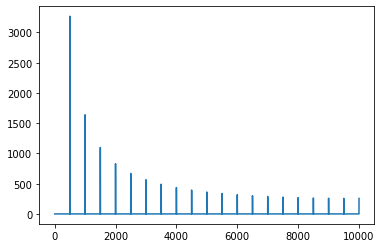

In [347]:
spectrum = wave.make_spectrum()
spectrum.plot()

Если к спектру применить фильтр из предыдущего задания, то амплитуда будет падать пропорционально $1/f^2$

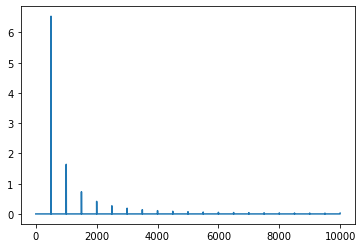

In [348]:
divide(spectrum)
spectrum.plot()
spectrum.make_wave().make_audio()